In [1]:
#Importing Libraries

from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
#Extracting Donald Trump's Tweets as a CSV file

df=pd.read_csv('C:\\Users\\hanvi\\OneDrive\\Desktop\\Tweets.csv')

In [3]:
df.head()

,Tweets
0,Be sure to tune in and watch Donald Trump on L...
1,Donald Trump will be appearing on The View tom...
2,Donald Trump reads Top Ten Financial Tips on L...
3,New Blog Post: Celebrity Apprentice Finale and...
4,"""My persona will never be that of a wallflower..."


In [4]:
df.isnull().sum()

Tweets    0
dtype: int64

In [5]:
#Cleaning Tweets with function clean

def clean(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #Removes @mentions
    text=re.sub(r'#','',text) #Removes '#'
    text=re.sub(r'RT[\s]+','',text) #Removes RT
    text=re.sub(r'https?:\/\/\S+','',text) #Removes links
    return text
df['Tweets']=df['Tweets'].apply(clean)

In [6]:
#Stemming of the tweets
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [7]:
df['Tweets']=df['Tweets'].apply(lambda x: stemming(x))

In [8]:
df.head()

,Tweets
0,Be sure to tune in and watch Donald Trump on L...
1,Donald Trump will be appearing on The View tom...
2,Donald Trump reads Top Ten Financial Tips on L...
3,New Blog Post: Celebrity Apprentice Finale and...
4,"""My persona will never be that of a wallflower..."


In [9]:
#Creating functions to get Subjectivity and Polarity

def sub(text):
    return TextBlob(text).sentiment.subjectivity
def pol(text):
    return TextBlob(text).sentiment.polarity

In [10]:
df['subjectivity']=df['Tweets'].apply(sub)
df['Polarity']=df['Tweets'].apply(pol)

In [11]:
df.head()

,Tweets,subjectivity,Polarity
0,Be sure to tune in and watch Donald Trump on L...,0.497222,0.175000
1,Donald Trump will be appearing on The View tom...,0.454545,0.170455
2,Donald Trump reads Top Ten Financial Tips on L...,0.420000,0.121250
3,New Blog Post: Celebrity Apprentice Finale and...,0.454545,0.136364
4,"""My persona will never be that of a wallflower...",0.000000,0.000000


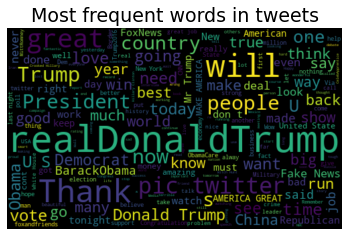

In [12]:
#Plotting WordCloud

words=' '.join([tweet for tweet in df['Tweets']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(words)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('Most frequent words in tweets', fontsize=19)
plt.show()

In [13]:
#Function to find sentiment of the tweets

def sent(pol):
    if pol<0:
        return 'Negative'
    elif pol==0:
        return 'Neutral'
    else:
        return 'Positive'

In [14]:
df['Sentiment']=df['Polarity'].apply(sent)

In [15]:
df.head()

,Tweets,subjectivity,Polarity,Sentiment
0,Be sure to tune in and watch Donald Trump on L...,0.497222,0.175000,Positive
1,Donald Trump will be appearing on The View tom...,0.454545,0.170455,Positive
2,Donald Trump reads Top Ten Financial Tips on L...,0.420000,0.121250,Positive
3,New Blog Post: Celebrity Apprentice Finale and...,0.454545,0.136364,Positive
4,"""My persona will never be that of a wallflower...",0.000000,0.000000,Neutral


Text(0.5, 1.0, 'Distribution of sentiments')

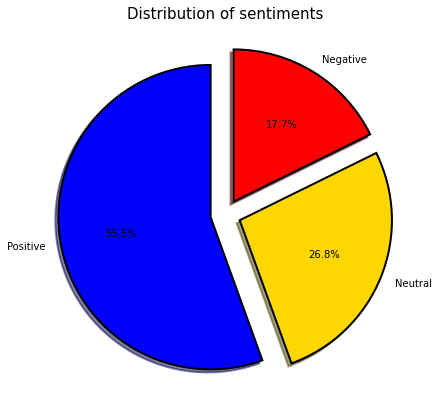

In [16]:
fig=plt.figure(figsize=(7,7))
colors=("Blue","gold","red")
wp={'linewidth':2,'edgecolor':"black"}
tags=df['Sentiment'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of sentiments',fontsize=15)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

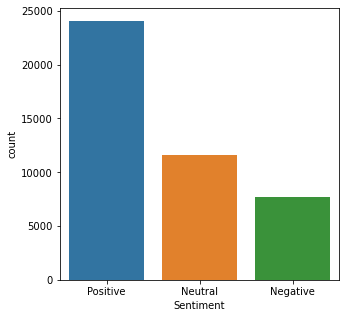

In [17]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='Sentiment',data=df)

In [18]:
#Printing positive tweets

pos_tweets=df[df.Sentiment=='Positive']
pos_tweets=pos_tweets.sort_values(['Polarity'],ascending=False)
pos_tweets.head()

,Tweets,subjectivity,Polarity,Sentiment
24481,Thank you @ TIME readers- a great honor! …,0.75,1.0,Positive
3543,I am very proud of Ivanka!,1.00,1.0,Positive
13953,""" @ HelsCahill: @ realDonaldTrump Congrats on ...",1.00,1.0,Positive
40321,Congratulations Kimberley. Great book! …,0.75,1.0,Positive
40319,"“Triggered,” a great book by my son, Don. Now ...",0.75,1.0,Positive


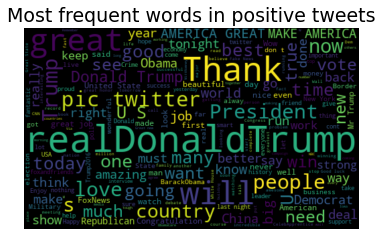

In [19]:
#Plotting WordCloud for Positive Tweets

words=' '.join([word for word in pos_tweets['Tweets']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(words)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [20]:
#Printing negative tweets

neg_tweets=df[df.Sentiment=='Negative']
neg_tweets=neg_tweets.sort_values(['Polarity'],ascending=False)
neg_tweets.head()

,Tweets,subjectivity,Polarity,Sentiment
34078,“This isn’t some game. You are screwing with t...,0.350000,-4.625929e-18,Negative
24133,""" @ Chr:DonaldTrump reminds me of Reagan his f...",0.433333,-1.387779e-17,Negative
33634,....cameras running. Another False Accusation....,0.666667,-1.850372e-17,Negative
28792,So many false and phony T.V. commercials being...,0.550000,-5.551115e-17,Negative
37190,“The underlying issue remains the same without...,0.491327,-6.802721e-04,Negative


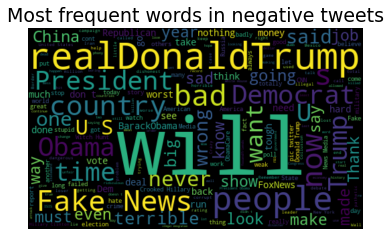

In [21]:
#Plotting WordCloud for negative Tweets

words=' '.join([word for word in neg_tweets['Tweets']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(words)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [22]:
#Printing neutral tweets

neu_tweets=df[df.Sentiment=='Neutral']
neu_tweets=neu_tweets.sort_values(['Polarity'],ascending=False)
neu_tweets.head()

,Tweets,subjectivity,Polarity,Sentiment
4,"""My persona will never be that of a wallflower...",0.000000,0.0,Neutral
27200,Hillary Clinton lied last week when she said I...,0.066667,0.0,Neutral
27203,"Thank you for your support in Biloxi, MS! Let'...",0.000000,0.0,Neutral
27209,"Iran, with all of the money and all else given...",0.000000,0.0,Neutral
27211,"By the way, Hillary & the MSM forgot to mentio...",0.000000,0.0,Neutral


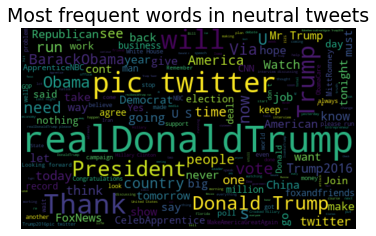

In [23]:
#Plotting WordCloud for neutral Tweets

words=' '.join([word for word in neu_tweets['Tweets']])
wordcloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(words)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [24]:
vec=CountVectorizer(ngram_range=(1,2)).fit(df['Tweets'])

In [25]:
feature_names=vec.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 322247

First 20 features:
 ['00', '00 00', '00 10', '00 15', '00 20', '00 30', '00 45', '00 abc', '00 afghanistan', '00 after', '00 am', '00 amazing', '00 american', '00 americans', '00 and', '00 at', '00 best', '00 big', '00 bill', '00 call']


In [26]:
X=df['Tweets']
Y=df['Sentiment']
X=vec.transform(X)

In [27]:
#Splitting train and test data

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

In [28]:
print("Size of x_train:",(x_train.shape))
print("Size of y_train:",(y_train.shape))
print("Size of x_test:",(x_test.shape))
print("Size of y_test:",(y_test.shape))

Size of x_train: (34679, 322247)
Size of y_train: (34679,)
Size of x_test: (8670, 322247)
Size of y_test: (8670,)


In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
#Training model using logistic regression and checking accuracy

lreg=LogisticRegression()
lreg.fit(x_train,y_train)
lreg_pred=lreg.predict(x_test)
lreg_acc=accuracy_score(lreg_pred,y_test)
print("Test accuracy: {:.2f}%".format(lreg_acc*100))

Test accuracy: 89.78%


In [31]:
print(confusion_matrix(y_test,lreg_pred))
print("\n")
print(classification_report(y_test,lreg_pred))

[[1131  205  218]
 [  40 2158  112]
 [ 126  185 4495]]


              precision    recall  f1-score   support

    Negative       0.87      0.73      0.79      1554
     Neutral       0.85      0.93      0.89      2310
    Positive       0.93      0.94      0.93      4806

    accuracy                           0.90      8670
   macro avg       0.88      0.87      0.87      8670
weighted avg       0.90      0.90      0.90      8670



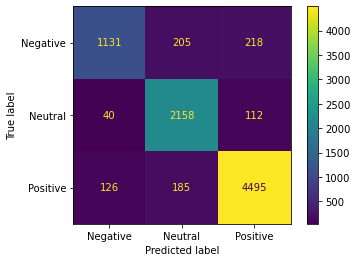

In [32]:
cm=confusion_matrix(y_test,lreg_pred,labels=lreg.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lreg.classes_)
disp.plot()

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [35]:
print("Best parameters:",grid.best_params_)

Best parameters: {'C': 10}


In [36]:
y_pred=grid.predict(x_test)

In [37]:
lreg_acc=accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(lreg_acc*100))

Test accuracy: 90.61%


In [38]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[1175  182  197]
 [  45 2161  104]
 [ 129  157 4520]]


              precision    recall  f1-score   support

    Negative       0.87      0.76      0.81      1554
     Neutral       0.86      0.94      0.90      2310
    Positive       0.94      0.94      0.94      4806

    accuracy                           0.91      8670
   macro avg       0.89      0.88      0.88      8670
weighted avg       0.91      0.91      0.91      8670



In [39]:
from sklearn.svm import LinearSVC

In [40]:
SVC=LinearSVC()
SVC.fit(x_train,y_train)

LinearSVC()

In [41]:
svc_pred=SVC.predict(x_test)
svc_acc=accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 91.12%


In [42]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[1197  171  186]
 [  39 2178   93]
 [ 118  163 4525]]


              precision    recall  f1-score   support

    Negative       0.88      0.77      0.82      1554
     Neutral       0.87      0.94      0.90      2310
    Positive       0.94      0.94      0.94      4806

    accuracy                           0.91      8670
   macro avg       0.90      0.88      0.89      8670
weighted avg       0.91      0.91      0.91      8670



In [43]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid=GridSearchCV(SVC,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [44]:
print("Best parameter:",grid.best_params_)

Best parameter: {'C': 1}


In [45]:
y_pred=grid.predict(x_test)

In [46]:
lreg_acc = accuracy_score(y_pred,y_test)
print("Test accuracy: {:.2f}%".format(lreg_acc*100))

Test accuracy: 91.12%


In [47]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[1197  171  186]
 [  39 2178   93]
 [ 118  163 4525]]


              precision    recall  f1-score   support

    Negative       0.88      0.77      0.82      1554
     Neutral       0.87      0.94      0.90      2310
    Positive       0.94      0.94      0.94      4806

    accuracy                           0.91      8670
   macro avg       0.90      0.88      0.89      8670
weighted avg       0.91      0.91      0.91      8670

